ref: http://www.open3d.org/docs/tutorial/Basic/rgbd_images/index.html

RGBD images

# Redwood dataset
This tutorial reads and visualizes an RGBDImage from the Redwood dataset [Choi2015].

In [1]:
# src/Python/Tutorial/Basic/rgbd_redwood.py

#conda install pillow matplotlib
from open3d import *
import matplotlib.pyplot as plt

print("Read Redwood dataset")
color_raw = read_image("/data/code6/Open3D/build/lib/TestData/RGBD/color/00000.jpg")
# The Redwood format stored depth in a 16-bit single channel image
# The integer value represents the depth measurement in millimeters.
# It is the default format for Open3D to parse depth images.
depth_raw = read_image("/data/code6/Open3D/build/lib/TestData/RGBD/depth/00000.png")

# The default conversion function create_rgbd_image_from_color_and_depth() creates an 
# RGBDImage from a pair of color and depth image.
rgbd_image = create_rgbd_image_from_color_and_depth(
    color_raw, depth_raw);
# The color image is converted into a grayscale image, stored in float ranged in [0, 1]. 
# The depth image is stored in float, representing the depth value in meters.
print(rgbd_image)


Read Redwood dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


In [3]:
type(rgbd_image.color)

open3d.Image

In [2]:
import numpy as np

In [3]:
np.asarray(rgbd_image.color).shape

(480, 640)

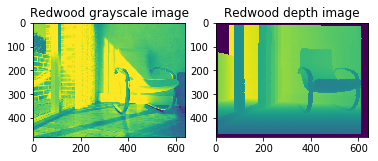

In [4]:
# The converted images can be rendered as numpy arrays.
plt.subplot(1, 2, 1)
plt.title('Redwood grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Redwood depth image')
plt.imshow(rgbd_image.depth)
plt.show()


In [5]:
# The RGBD image can be converted into a point cloud, given a set of camera parameters.
pcd = create_point_cloud_from_rgbd_image(rgbd_image, PinholeCameraIntrinsic(
        PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
draw_geometries([pcd])

Here we use PinholeCameraIntrinsicParameters.PrimeSenseDefault as default camera parameter. It has image resolution 640x480, focal length (fx, fy) = (525.0, 525.0), and optical center (cx, cy) = (319.5, 239.5). An identity matrix is used as the default extrinsic parameter. pcd.transform applies an up-down flip transformation on the point cloud for better visualization purpose.

# SUN dataset
This tutorial reads and visualizes an RGBDImage of the SUN dataset [Song2015].

In [6]:
# src/Python/Tutorial/Basic/rgbd_sun.py

#conda install pillow matplotlib
from open3d import *
import matplotlib.pyplot as plt




In [8]:
print("Read SUN dataset")
color_raw = read_image("/data/code6/Open3D/build/lib/TestData/RGBD/other_formats/SUN_color.jpg")
depth_raw = read_image("/data/code6/Open3D/build/lib/TestData/RGBD/other_formats/SUN_depth.png")
rgbd_image = create_rgbd_image_from_sun_format(color_raw, depth_raw);
print(rgbd_image)

Read SUN dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


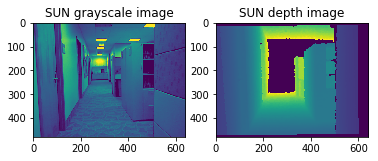

In [9]:
plt.subplot(1, 2, 1)
plt.title('SUN grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('SUN depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [10]:
pcd = create_point_cloud_from_rgbd_image(rgbd_image, PinholeCameraIntrinsic(
        PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
draw_geometries([pcd])

# NYU dataset
This tutorial reads and visualizes an RGBDImage from the NYU dataset [Silberman2012].

In [11]:
# src/Python/Tutorial/Basic/rgbd_nyu.py

#conda install pillow matplotlib
from open3d import *
import numpy as np
import re
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [12]:
# This is special function used for reading NYU pgm format
# as it is written in big endian byte order.
def read_nyu_pgm(filename, byteorder='>'):
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    img = np.frombuffer(buffer,
        dtype=byteorder+'u2',
        count=int(width)*int(height),
        offset=len(header)).reshape((int(height), int(width)))
    img_out = img.astype('u2')
    return img_out


In [13]:
print("Read NYU dataset")
# Open3D does not support ppm/pgm file yet. Not using read_image here.
# MathplotImage having some ISSUE with NYU pgm file. Not using imread for pgm.
# we use mpimg.imread to read the color image as a numpy array.
color_raw = mpimg.imread("/data/code6/Open3D/build/lib/TestData/RGBD/other_formats/NYU_color.ppm")
depth_raw = read_nyu_pgm("/data/code6/Open3D/build/lib/TestData/RGBD/other_formats/NYU_depth.pgm")
# convert it to an Open3D Image
color = Image(color_raw)
depth = Image(depth_raw)
rgbd_image = create_rgbd_image_from_nyu_format(color, depth)
print(rgbd_image)

Read NYU dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


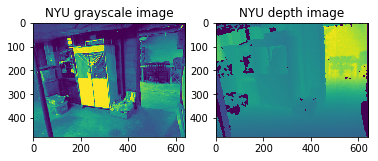

In [14]:
plt.subplot(1, 2, 1)
plt.title('NYU grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('NYU depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [15]:
pcd = create_point_cloud_from_rgbd_image(rgbd_image, PinholeCameraIntrinsic(
        PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
draw_geometries([pcd])

# TUM dataset
This tutorial reads and visualizes an RGBDImage from the TUM dataset [Strum2012].

In [16]:
# src/Python/Tutorial/Basic/rgbd_tum.py

#conda install pillow matplotlib
from open3d import *
import matplotlib.pyplot as plt

In [17]:
print("Read TUM dataset")
color_raw = read_image("/data/code6/Open3D/build/lib/TestData/RGBD/other_formats/TUM_color.png")
depth_raw = read_image("/data/code6/Open3D/build/lib/TestData/RGBD/other_formats/TUM_depth.png")
# we use conversion function create_rgbd_image_from_tum_format to 
# parse depth images in the TUM dataset.
rgbd_image = create_rgbd_image_from_tum_format(color_raw, depth_raw);
print(rgbd_image)

Read TUM dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


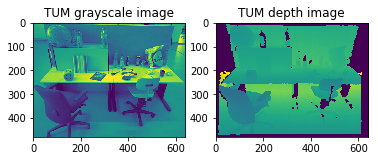

In [19]:
plt.subplot(1, 2, 1)
plt.title('TUM grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('TUM depth image')
plt.imshow(rgbd_image.depth)
plt.show()

pcd = create_point_cloud_from_rgbd_image(rgbd_image, PinholeCameraIntrinsic(
        PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
draw_geometries([pcd])